In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# load custom libraries
from generate_mission_profile import pnt2line, vector

# Developing the Mission Profile
We want a vector field for the uuv to travel in straight lines between waypoints.

The entire path will be generated at once.

A seperate vector field will be calculated for each waypoint.

## Geometry Setup
Global origin is in the bottom left corner (no negative coordinates).

In [2]:
# define the world grid
x_spacing = 1
y_spacing = 1
max_x = 20
max_y = 20

world_x = np.linspace(1,max_x,max_x*x_spacing)
world_y = np.linspace(1,max_y,max_y*y_spacing)
world_X, world_Y = np.meshgrid(world_x, world_y)

Calculate the vector points based on the closest line point

In [3]:
# test basic pathfinding
start_point = (1,1,0)
end_point = (8,12,0)

world_z=[0]
z_crd=0

x_vec_array = []
y_vec_array = []

for y_crd in world_y:
    x_vecs = []
    y_vecs = []
    for x_crd in world_x:
        mod_x, mod_y, mod_z = vector((x_crd,y_crd,z_crd),end_point)
        dist, point = pnt2line((x_crd, y_crd, z_crd), start_point, end_point)
        my_dx = point[0] - x_crd
        my_dy = point[1] - y_crd
        x_vecs.append(my_dx)
        y_vecs.append(my_dy)
    x_vec_array.append(x_vecs)
    y_vec_array.append(y_vecs)
    
            

In [4]:
mission_dx = np.ones(world_X.shape)
mission_dy = np.ones(world_Y.shape)
mission_dz = np.zeros(world_X.shape)

behavior_dx = mission_dx + x_vec_array
behavior_dy = mission_dy + y_vec_array
behavior_dz = np.zeros(behavior_dx.shape)

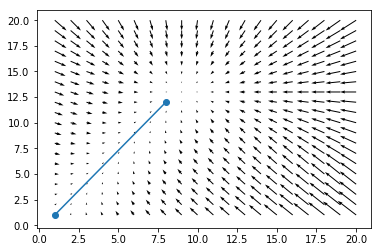

In [5]:
fig, ax = plt.subplots()
ax.quiver(world_X, world_Y, behavior_dx, behavior_dy)
ax.scatter([start_point[0], end_point[0]],[start_point[1],end_point[1]])
ax.plot([start_point[0], end_point[0]],[start_point[1],end_point[1]])
plt.show()

Output to a csv.
* Segment number
* x
* y
* z
* dx
* dy
* dz